In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sea
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


To help with this challenge I used the following sources:

Followed this tutorial to build Linear regression model.
https://www.youtube.com/watch?v=mSusDGZhkVU&t=1447s

Creating a bargraph in seaborn:
https://www.youtube.com/watch?v=3Yh4U5OB5Sk

https://seaborn.pydata.org/api.html

https://matplotlib.org/stable/api/



My goal in this challenge was to create visualizations to understand the correlations between a star's attributes and how they contribute to the star type, and achieve a deeper understanding of differences between each of the star types.

In [2]:
data=pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
data['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

It looks like there is no particular star type that is most common in this dataset, rather there are 40 of each type of star in this dataset.

Lets go deeper into the data and look at graphs of some variables plotted against each other to get a better sense of the factors that influence a star's type

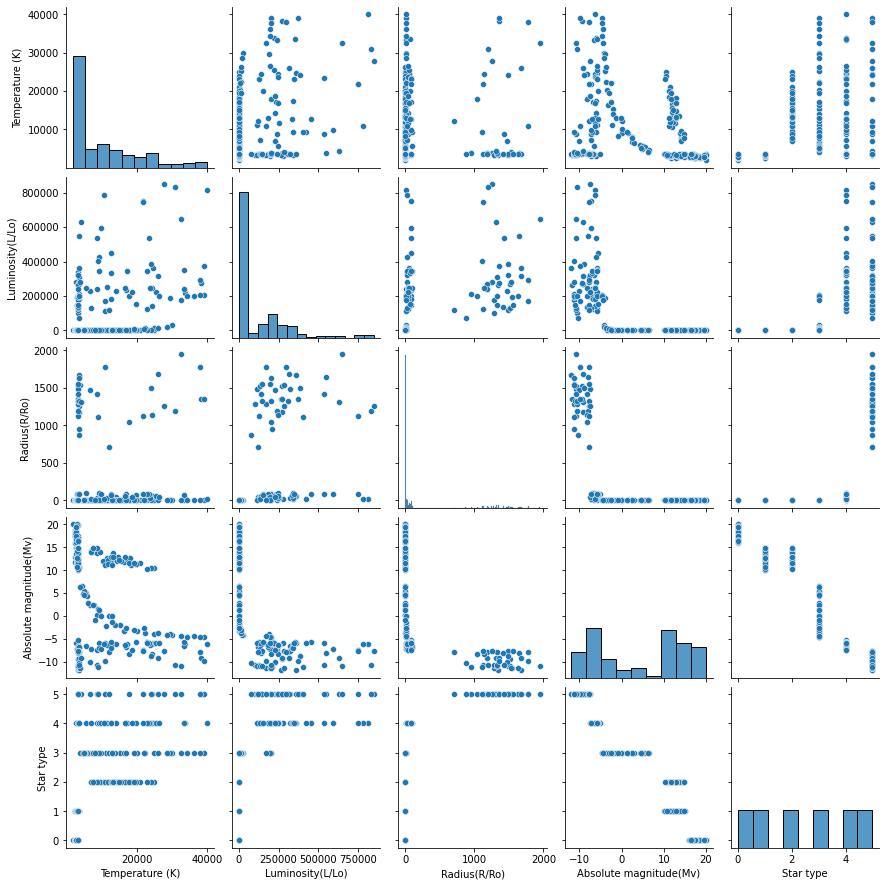

In [4]:
sea.pairplot(data=data)

We can draw numerous conclusions from this set of graphs. 

1. Starting with Temperature and Star Type, we can see that for each star type, the variance in the temperature increases as you go up a star type.

2. Next, lets take a look at the relationship between star type and Luminosity. As you continue going up star types, the amount of variance in the Luminosity from the dimmest to the brightest star increases. It looks like Stars in Star Types 0-2 had similar luminosities but Stars in Star Types 3-5 become brighter as you go up star types.

3. Radius and star type appear to have some sort of correlation. The average radius of star types 4 and 5 is greater than what can be seen of stars in groups 0-3

4. Absolute Magnitude and star type seem to have a strong correlation. There is a clear trend of decreasing absolute manitude as you go up a star type.

# There were some variables that weren't present in the graphs so I decided to create bar graphs to visualize these elements 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


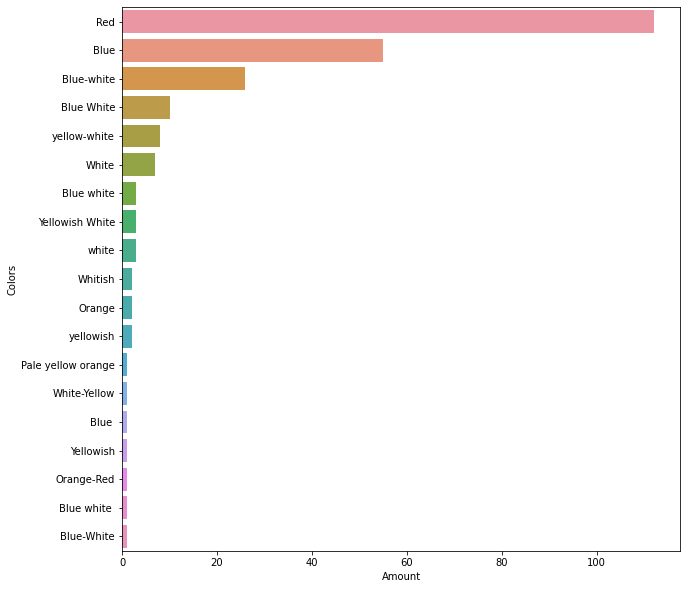

In [5]:
star_color = data['Star color'].value_counts()
plt.figure(figsize=(10, 10))
sea.barplot(star_color, star_color.index);
plt.ylabel('Colors', fontsize=10)
plt.xlabel('Amount', fontsize=10);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


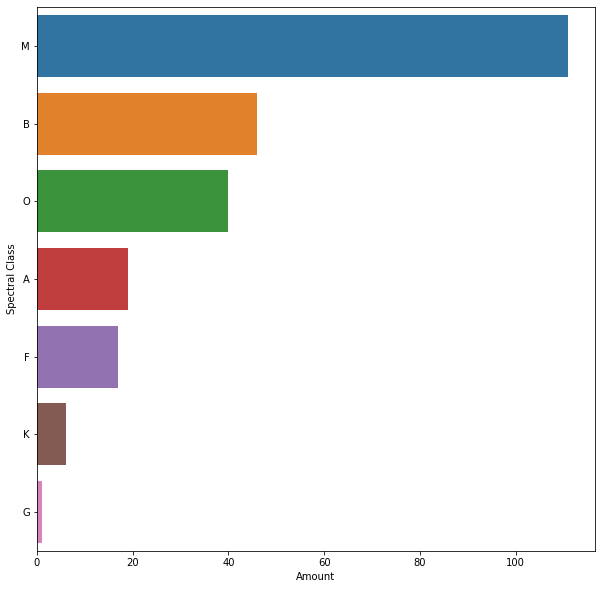

In [6]:
star_color = data['Spectral Class'].value_counts()
plt.figure(figsize=(10, 10))
sea.barplot(star_color, star_color.index);
plt.ylabel('Spectral Class', fontsize=10)
plt.xlabel('Amount', fontsize=10);

<AxesSubplot:xlabel='Temperature (K)', ylabel='Star color'>

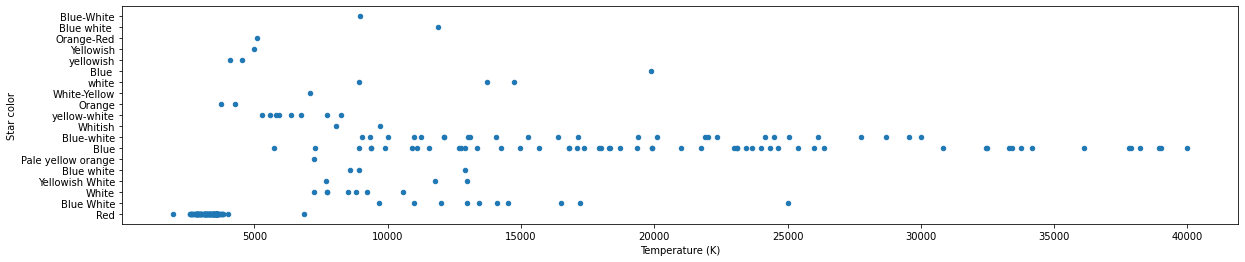

In [7]:
data.plot.scatter(x = 'Temperature (K)', y = 'Star color', figsize=(20, 4))

Based on this scatterplot, we can determine that it is possible to get a general range of the temperature of a star given its color.

# Hertzsprung-Russell Diagram

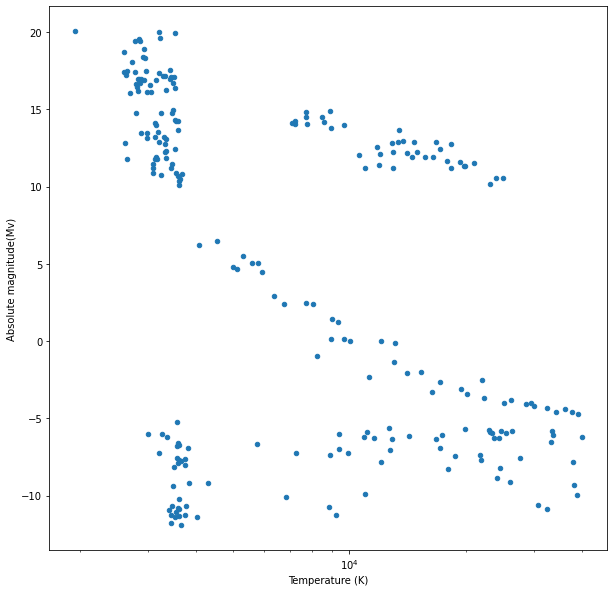

In [8]:
data.plot.scatter(x = 'Temperature (K)', y = 'Absolute magnitude(Mv)', figsize=(10,10)).set_xscale('log')


When plotting Temperature against Absolute Magnitude and using a logarithmic scale to account for large skews, we end up with a Hertzsprung-Russell Diagram. The Hertzsprung-Russell Diagram generated here is similar to the one shown in Kaggle. The different star types can be made out in this diagram.

# Average Temp per Star Type

Finally I calculated the average values of each of the following attributes, Temperature (K), Luminosity(L/Lo), Radius(R/Ro), and Absolute magnitude(Mv) of each Star Type. This helps me get a better sense of the each of the differences between each star type.

In [9]:
for x in range (6):
    temp = data.loc[data['Star type'] == x, 'Temperature (K)'].mean()
    result = f'Star type {x}: ' + str(temp)
    print(result)

Star type 0: 2997.95
Star type 1: 3283.825
Star type 2: 13931.45
Star type 3: 16018.0
Star type 4: 15347.85
Star type 5: 11405.7


# Average Luminosity per Star Type

In [10]:
for x in range (6):
    temp = data.loc[data['Star type'] == x, 'Luminosity(L/Lo)'].mean()
    result = f'Star type {x}: ' + str(temp)
    print(result)

Star type 0: 0.0006932749999999999
Star type 1: 0.00540575
Star type 2: 0.0024336249999999996
Star type 3: 32067.386274999997
Star type 4: 301816.25
Star type 5: 309246.525


# Average Radius per Star Type

In [11]:
for x in range (6):
    temp = data.loc[data['Star type'] == x, 'Radius(R/Ro)'].mean()
    result = f'Star type {x}: ' + str(temp)
    print(result)

Star type 0: 0.110015
Star type 1: 0.34814500000000004
Star type 2: 0.01072825
Star type 3: 4.4303
Star type 4: 51.15
Star type 5: 1366.8975


# Average Absolute Magnitude per Star Type

In [12]:
for x in range (6):
    temp = data.loc[data['Star type'] == x, 'Absolute magnitude(Mv)'].mean()
    result = f'Star type {x}: ' + str(temp)
    print(result)

Star type 0: 17.5635
Star type 1: 12.539974999999998
Star type 2: 12.582500000000001
Star type 3: -0.367425
Star type 4: -6.369925
Star type 5: -9.65425


# Now I wanted to try building a model to predict the star type of a star.

I decided to go with Absolute Magnitude and Luminosity as my variables because these attributes seemed to have the greatest effect on star type.

In [13]:
from copy import deepcopy
train_df = data[['Absolute magnitude(Mv)','Luminosity(L/Lo)','Star type']]
train_df

,Absolute magnitude(Mv),Luminosity(L/Lo),Star type
0,16.12,0.002400,0
1,16.60,0.000500,0
2,18.70,0.000300,0
3,16.65,0.000200,0
4,20.06,0.000138,0
...,...,...,...
235,-9.93,374830.000000,5
236,-10.63,834042.000000,5
237,-10.73,537493.000000,5
238,-11.23,404940.000000,5


In [14]:
x_train, y_train = train_df.to_numpy()[:,:-1],train_df.to_numpy()[:,-1]
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train,y_train)
lr.coef_

array([-1.51931175e-01,  2.78698529e-07])

In [15]:
lr.intercept_

3.135949311110091

Here we have a linear regression model. The value -1.52 is the coefficent for our x value (Absolute magnitude) and the value 2.79 is the coefficent for our y value (Luminosity). The intercept of this regression model is 3.14. Basically, if we were to plug in a value for the absolute magnitude multiply that by -1.52, and plug in another value for luminosity and multiply this value by 2.79, then add these two numbers to our intercept of 3.14, we can predict the star type of a star given its absolute magnitude and it luminosity. However, this linear regression model is not 100% accurate.